<h1 align='center'>University Admission Prediction</h1>

<h3>Importing Necessary Libraries And Dataset</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

C:\Users\Joydip\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read the csv file 
ad=pd.read_csv("Admission_Predict.csv")

In [3]:
ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Let's drop the serial no.
ad.drop(["Serial No."], axis=1, inplace=True)
ad

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


<h3>Performing EDA</h3>

In [5]:
# Checking the null values
ad.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
ad.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
univ=ad.groupby(by="University Rating").mean()
univ

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


<h3>Visualizing the Data</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EB85AD0C8>,
      dtype=object)

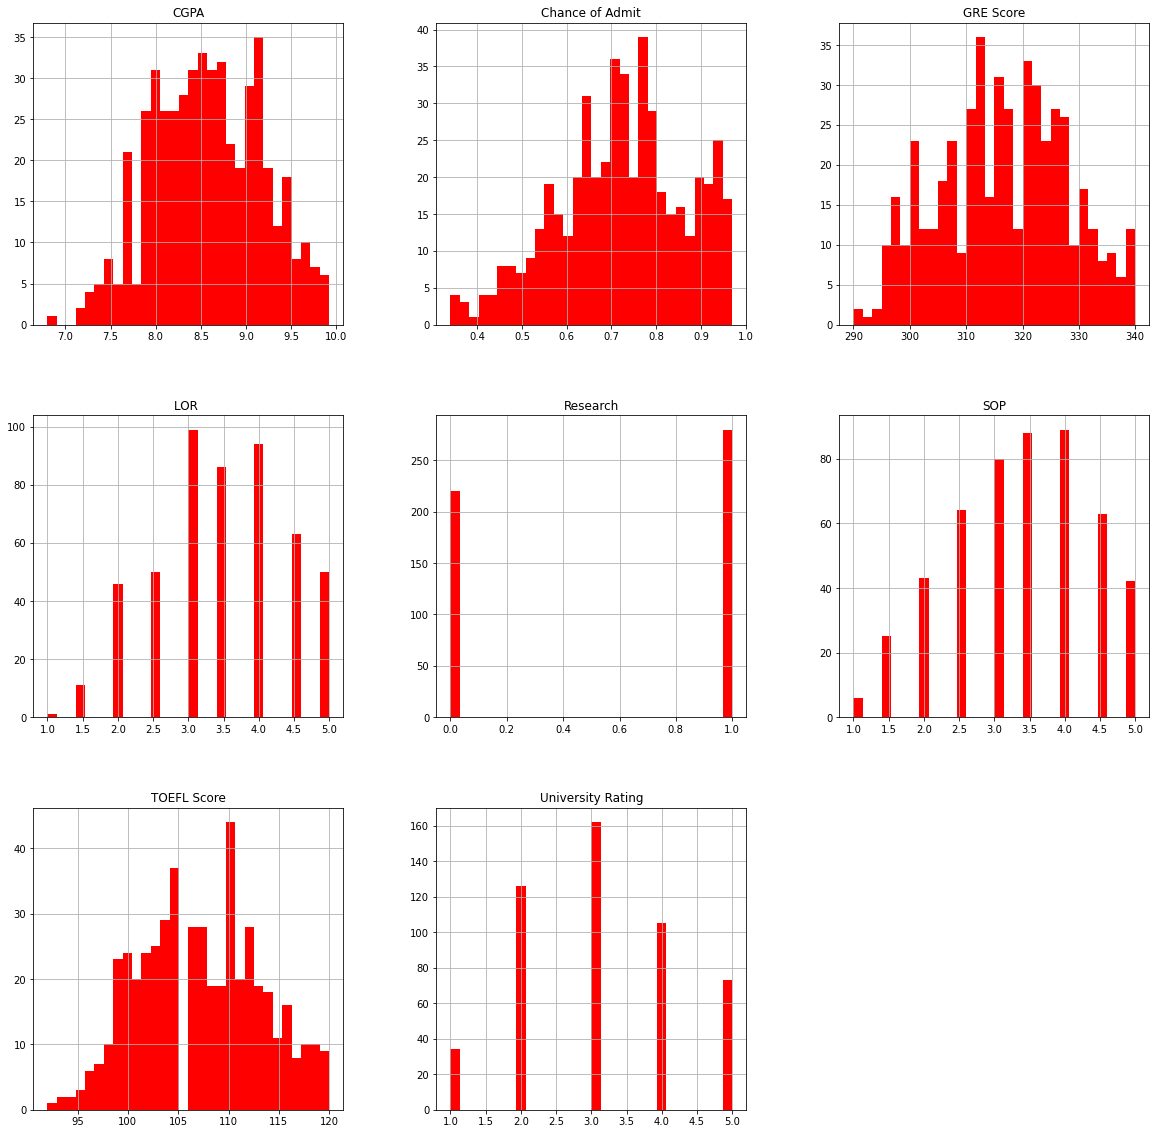

In [9]:
ad.hist(bins=30, figsize=(20, 20), color="r")

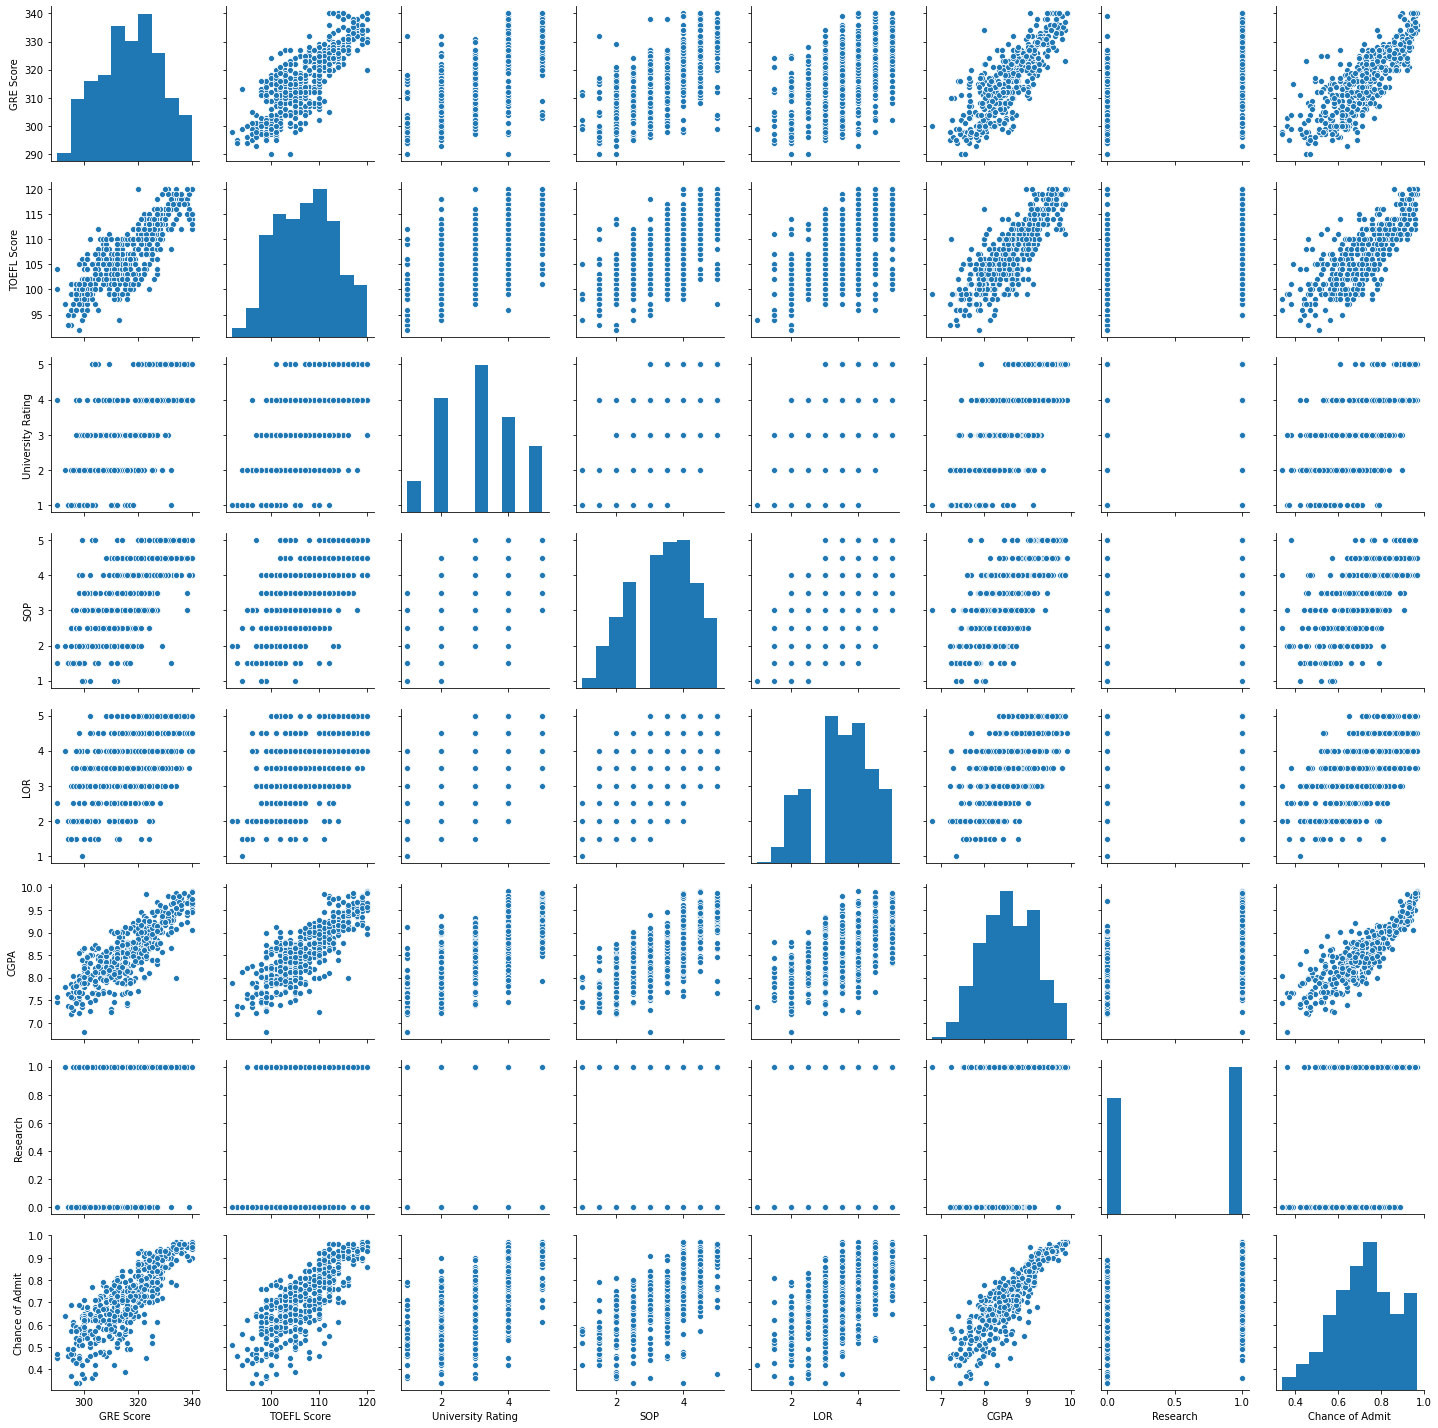

In [10]:
sb.pairplot(data=ad)
# Data visualisation of all variables in the dataframe

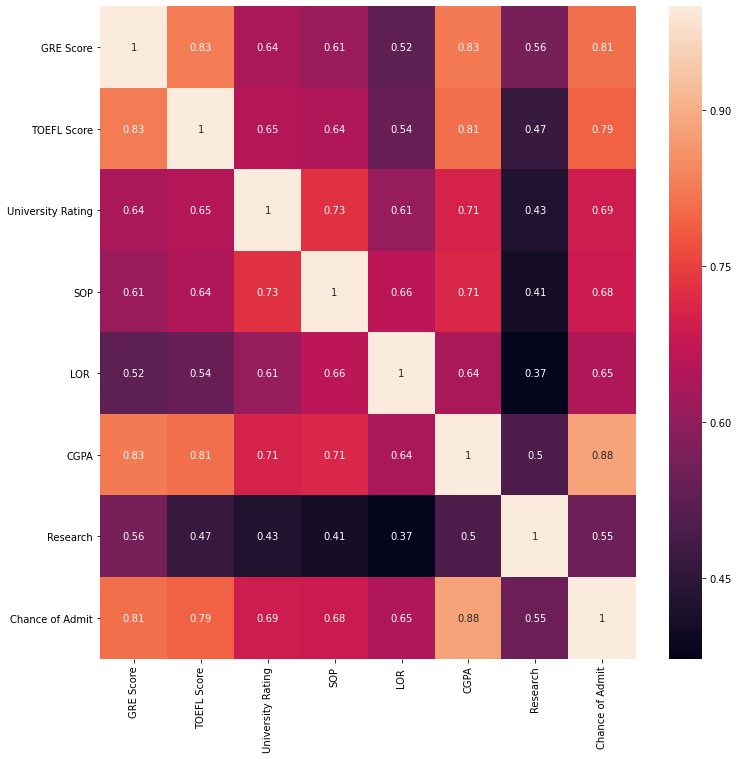

In [11]:
corr=ad.corr()
plt.figure(figsize=(12, 12))
sb.heatmap(corr, annot=True)
plt.show()

<h3>Creating Training And Testing Dataset</h3>

In [12]:
ad.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
# Independent variables
x=ad.drop(columns=['Chance of Admit'])

In [14]:
# Dependent variables
y=ad["Chance of Admit"]

In [15]:
print(x.shape, y.shape)

(500, 7) (500,)


In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
y=y.reshape(-1, 1)
y.shape

(500, 1)

In [18]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc_x=StandardScaler()
x=sc_x.fit_transform(x)

sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [19]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 7) (100, 7) (400, 1) (100, 1)


<h3>Train And Evaluate a Linear Regression Model</h3>

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [21]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lr_acc=lr.score(x_test, y_test)
lr_acc

0.7664048993199386

<h3>Train And Evaluate An Artificial Neural Network</h3>

In [23]:
import tensorflow as tf
from tensorflow import keras # Importing the Keras API from the TensorFlow backend framework
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [24]:
ANN_model = keras.Sequential()

# Layer 1
ANN_model.add(Dense(50, input_dim = 7)) # Adding 50 neurons with 7 inputs
ANN_model.add(Activation('relu')) # Adding a rectified linear unit activation function

# Layer 2
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5)) # Dropping 50% neurons to ensure the model is not overfitting

# Layer 3
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

#Output layer
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [25]:
# Compiling the model and specifying the loss function
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [26]:
# Epochs: number of times the I/O data is passed, and the weights are updated
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
16/16 [==============================] - 1s 44ms/step - loss: 0.6690 - val_loss: 0.2339
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.3500 - val_loss: 0.2426
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3344 - val_loss: 0.2071
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3100 - val_loss: 0.2039
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.2839 - val_loss: 0.1968
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2694 - val_loss: 0.1912
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2618 - val_loss: 0.1971
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2400 - val_loss: 0.1849
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2419 - val_loss: 0.1976
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2408 - val_loss: 0.1770
Epoch 

Epoch 83/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1407 - val_loss: 0.2000
Epoch 84/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1265 - val_loss: 0.2390
Epoch 85/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1340 - val_loss: 0.2040
Epoch 86/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1428 - val_loss: 0.2310
Epoch 87/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1372 - val_loss: 0.1909
Epoch 88/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1397 - val_loss: 0.1917
Epoch 89/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1416 - val_loss: 0.2188
Epoch 90/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1116 - val_loss: 0.2107
Epoch 91/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1345 - val_loss: 0.1976
Epoch 92/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1422 - val_loss: 0.1969

In [27]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

4/4 [==============================] - 0s 4ms/step - loss: 0.2438
Accuracy : 0.7561687678098679


In [28]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

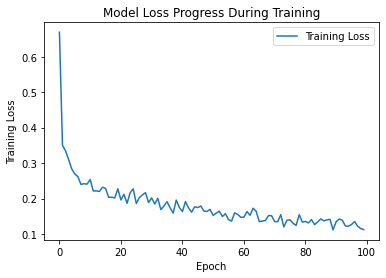

In [29]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

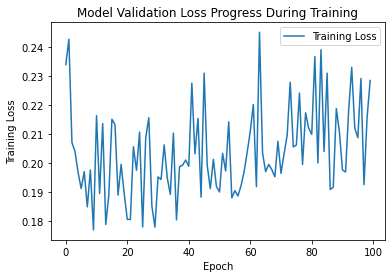

In [30]:
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Validation Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

<h3>Train And Evaluate Decision Tree And Random Forest Models</h3>

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_model=DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [32]:
accuracy_dt=dt_model.score(x_test, y_test)
accuracy_dt

0.5326586409768249

In [33]:
 from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=100, max_depth=5)
rf_model.fit(x_train, y_train)

C:\Users\Joydip\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
accuracy_rf=rf_model.score(x_test, y_test)
accuracy_rf

0.7753225529321148

<h3>Calculate KPIs Of The Best Model</h3>

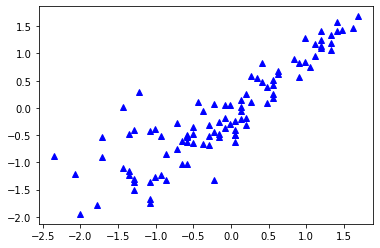

In [35]:
y_predict=rf_model.predict(x_test)
plt.plot(y_test, y_predict, "^", color="blue")

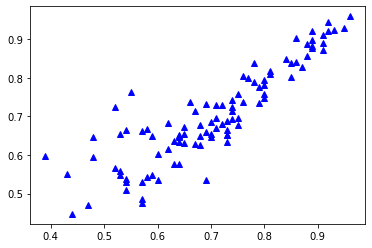

In [36]:
# Inverse transformation of scaled data
y_predict_orig=sc_y.inverse_transform(y_predict)
y_test_orig=sc_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, "^", color="blue")

In [37]:
k = x_test.shape[1]
n = len(x_test)
n

100

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

rmse = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
mse = mean_squared_error(y_test_orig, y_predict_orig)
mae = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print("RMSE = ", rmse, "\nMSE = ", mse, "\nMAE = ", mae, "\nR-squared = ", r2, "\nAdjusted R-squared = ", adj_r2)


RMSE =  0.063 
MSE =  0.003923935443678848 
MAE =  0.0433313063571306 
R-squared =  0.7753225529321148 
Adjusted R-squared =  0.7582275297856453
